<img src="../../img/bird_data_eda.png" alt="" style="width: 100%; border-radius: 20px;"/>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# df_path = 'D:\\Simon\\Documents\\GP\\data\\datasets\\selected_species_50km_luse.csv
df_path = 'D:\Simon\Documents\GP\data\datasets\land_use\land_use_percentage.csv'

df = pd.read_csv(df_path, index_col=0)

C:\Users\simon\AppData\Local\Temp\ipykernel_18152\1065206554.py:4: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(df_path, index_col=0)


In [29]:
df.head(2)

,id_sighting,id_species,name_species,date,timing,coord_lat,coord_lon,precision,altitude,total_count,...,forest_area_percent,grassland_area_percent,shrubland_area_percent,coastal_area_percent,rocky_area_percent,sparsley_vegetated_area_percent,burnt_area_percent,glacier_area_percent,wetlands_area_percent,water_area_percent
0,29666972,8.0,Haubentaucher,2018-01-01,NaN,53.157760,8.676993,place,-1.051010,0.0,...,0.0,0.0,0.021766,0.0,0.0,0.0,0.0,0.0,0.0,0.387377
1,29654244,397.0,Schwarzkehlchen,2018-01-01,NaN,53.127639,8.957263,square,0.760781,2.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [24]:
unique_species = df['name_species'].unique().tolist()
print(unique_species)

['Haubentaucher', 'Schwarzkehlchen', 'Wiesenpieper', 'Wasseramsel', 'Rohrammer', 'Mittelspecht', 'Bergpieper', 'Singschwan', 'Seeadler', 'Rostgans', 'Flussuferläufer', '0', 'Bergente', 'Berghänfling', 'Sperlingskauz', 'Dreizehenspecht', 'Knäkente', 'Auerhuhn', 'Alpenschneehuhn', 'Schwarzmilan', 'Zitronenzeisig (Zitronengirlitz)', 'Steinschmätzer', 'Braunkehlchen', 'Gelbspötter', 'Orpheusspötter', 'Zwergohreule', 'Karmingimpel', 'Gänsegeier']


In [28]:
count_of_zero_species = df['name_species'].value_counts().get('0', 0)
print(f"The count of species named '0' is: {count_of_zero_species}")

The count of species named '0' is: 51606


In [31]:
rows_with_zero_species = df[df['name_species'] == '0']

# Printing the rows where the species name is '0'
rows_with_zero_species.head(5)

,id_sighting,id_species,name_species,date,timing,coord_lat,coord_lon,precision,altitude,total_count,...,forest_area_percent,grassland_area_percent,shrubland_area_percent,coastal_area_percent,rocky_area_percent,sparsley_vegetated_area_percent,burnt_area_percent,glacier_area_percent,wetlands_area_percent,water_area_percent
56,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
131,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
301,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
302,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Selecting only the columns that represent area percentages
area_cols = ['urban_area_percent', 'industrial_area_percent', 'agriculture_area_percent', 'forest_area_percent', 'grassland_area_percent', 'shrubland_area_percent', 'coastal_area_percent', 'rocky_area_percent', 'sparsley_vegetated_area_percent', 'burnt_area_percent', 'glacier_area_percent', 'wetlands_area_percent', 'water_area_percent']

In [ ]:
species_land_use_counts = df.groupby(['name_species', 'LUSE']).size().reset_index(name='count')

In [38]:
pivot_table = species_land_use_counts.pivot(index='name_species', columns='LUSE', values='count').fillna(0)
normalized_pivot = pivot_table.div(pivot_table.sum(axis=1), axis=0)

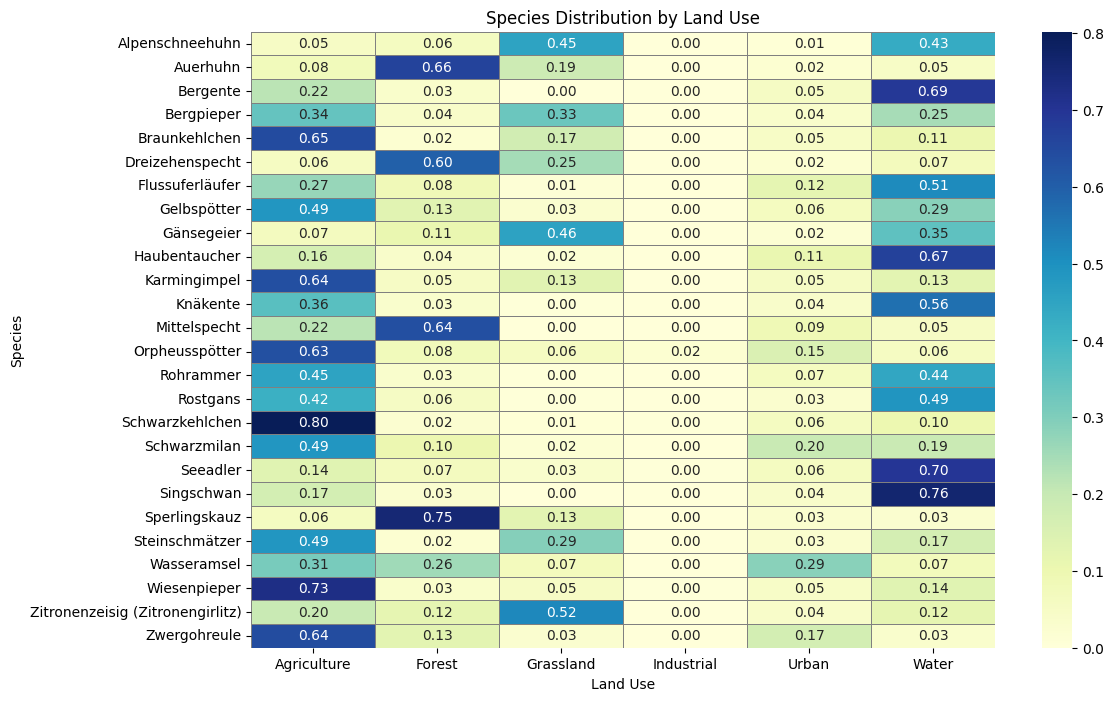

In [39]:
plt.figure(figsize=(12, 8))
sns.heatmap(normalized_pivot, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=.5, linecolor='gray')
plt.title('Species Distribution by Land Use')
plt.xlabel('Land Use')
plt.ylabel('Species')
plt.show()